In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Diabetes-Classification.csv')
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [36]:
data = data.dropna()
data.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [37]:
data.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,No


In [6]:
#we need to change string format
#We'll do this by encoding

#Label Encoding
from sklearn.preprocessing import LabelEncoder

cat_col = ["Gender", "Blood Pressure", "Family History of Diabetes", "Smoking", "Diet", "Exercise", "Diagnosis"]
le = LabelEncoder()

for col in cat_col:
    data[col] = le.fit_transform(data[col])
    
data.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25.0,2,100,5.7,0,0,0,1,0
1,55,0,30.0,0,120,6.4,1,1,1,0,1
2,65,1,35.0,0,140,7.1,1,1,1,0,1
3,75,0,40.0,0,160,7.8,1,1,1,0,1
5,50,0,25.0,2,100,5.7,0,0,0,1,0


In [38]:
#applying one hot encoding

cat_col = ["Gender", "Blood Pressure", "Family History of Diabetes", "Smoking", "Diet", "Exercise"]

one_encoded = pd.get_dummies(data, columns = cat_col, dtype= int)
one_encoded.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,No,0,1,0,0,1,1,0,1,0,1,0,0,1
1,55,30.0,120,6.4,Yes,1,0,1,0,0,0,1,0,1,0,1,1,0
2,65,35.0,140,7.1,Yes,0,1,1,0,0,0,1,0,1,0,1,1,0
3,75,40.0,160,7.8,Yes,1,0,1,0,0,0,1,0,1,0,1,1,0
5,50,25.0,100,5.7,No,1,0,0,0,1,1,0,1,0,1,0,0,1


In [39]:
#ASSIGNMENT BELOW
#Part 1 - EDA 
one_encoded.info()

#notes: time series analysis, correlation analysis, detecting anomalies
#Time Series analysis is not applicable here


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             118 non-null    int64  
 1   BMI                             118 non-null    float64
 2   FBS                             118 non-null    int64  
 3   HbA1c                           118 non-null    float64
 4   Diagnosis                       118 non-null    object 
 5   Gender_Female                   118 non-null    int64  
 6   Gender_Male                     118 non-null    int64  
 7   Blood Pressure_High             118 non-null    int64  
 8   Blood Pressure_Low              118 non-null    int64  
 9   Blood Pressure_Normal           118 non-null    int64  
 10  Family History of Diabetes_No   118 non-null    int64  
 11  Family History of Diabetes_Yes  118 non-null    int64  
 12  Smoking_No                      118 non-n

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             118 non-null    int64  
 1   BMI                             118 non-null    float64
 2   FBS                             118 non-null    int64  
 3   HbA1c                           118 non-null    float64
 4   Diagnosis                       118 non-null    int64  
 5   Gender_Female                   118 non-null    int64  
 6   Gender_Male                     118 non-null    int64  
 7   Blood Pressure_High             118 non-null    int64  
 8   Blood Pressure_Low              118 non-null    int64  
 9   Blood Pressure_Normal           118 non-null    int64  
 10  Family History of Diabetes_No   118 non-null    int64  
 11  Family History of Diabetes_Yes  118 non-null    int64  
 12  Smoking_No                      118 non-n

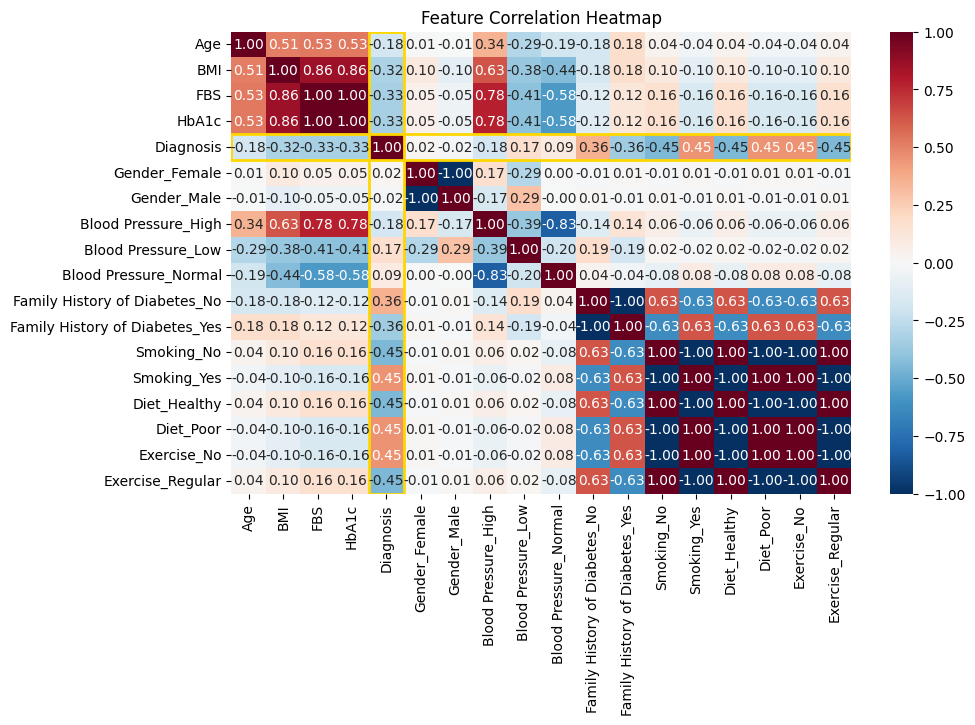

In [52]:
#Correlation analysis 
import seaborn as sns
plt.figure(figsize=(10, 6))

#binary encode target variable first
fully_encoded = one_encoded.copy()
fully_encoded["Diagnosis"] = one_encoded["Diagnosis"].map({'No': 0, 'Yes': 1})
fully_encoded.info()
corr = fully_encoded.corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f')

#formatting to highlight target variable
import matplotlib.patches as patches

ax = plt.gca()
n = corr.columns.get_loc("Diagnosis")  # get index of Diagnosis column
i = corr.index.get_loc("Diagnosis")
border1 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border2 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border1)
ax.add_patch(border2)

plt.title('Feature Correlation Heatmap')
plt.show()


Extracting conclusions from the heatmap
Target variable = Diagnosis
Strongest correlations with the target variable (excl. with itself) are with smokers, poor diet and no exercise.

issue with family history of diabetes data?

Almost no correlation with gender and normal blood pressure
We can also easily observe from this heatmap the correlations between other health factors.

In [64]:
# Detecting Anomalies
# Isolation Forest is appropriate here

from sklearn.ensemble import IsolationForest

ifmodel = IsolationForest(contamination = 0.05, random_state = 42)
ifmodel.fit(fully_encoded.drop(columns=["Diagnosis"]))
assign_anomalies = ifmodel.predict(fully_encoded.drop(columns=["Diagnosis"]))
anomalous_rows = assign_anomalies == -1
print("Anomalous data:\n", fully_encoded[anomalous_rows])


Anomalous data:
      Age    BMI  FBS  ...  Diet_Poor  Exercise_No  Exercise_Regular
7     70   35.0  140  ...          0            0                 1
8     45   25.0   80  ...          1            1                 0
16    25   15.0   80  ...          0            0                 1
55   185   17.0   80  ...          1            1                 0
100   12   10.0   80  ...          0            0                 1
112   17  105.0  100  ...          1            1                 0

[6 rows x 18 columns]


We have identified a possible age anomaly of 185 years old and possible BMI anomalies of 10.0, 15.0, 17.0 and 105.0.
Not sure if the first two columns have anomalous data...

In [68]:
#ASSIGNMENT END
#Feature Selection; Removing irrelevant features, features that do not contribute to the target variable
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func = f_classif, k = 5)
x = one_encoded.drop(["Diagnosis"], axis = 1)
y = one_encoded["Diagnosis"]

#impute missing values for BMI
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
x_imputed = imputer.fit_transform(x)

x_selected = selector.fit_transform(x_imputed, y)
selected_features = x.columns[selector.get_support()]
print(selected_features)


Index(['Smoking_Yes', 'Diet_Healthy', 'Diet_Poor', 'Exercise_No',
       'Exercise_Regular'],
      dtype='object')


In [71]:
x1 = one_encoded[selected_features] #dataframe with only selected features

#now train-test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
knn = KNeighborsClassifier(n_neighbors = 5)

#all features
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
#selected features
x1_train, x1_test, y1_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
knn_selected = KNeighborsClassifier(n_neighbors = 5)
knn_selected.fit(x1_train, y_train)
y_pred_knn1 = knn_selected.predict(x1_test)

In [75]:
#classification report
from sklearn.metrics import classification_report

print(f"KNN Performance:\n", classification_report(y_test, y_pred_knn))
print(f"KNN_Selected Performance:\n", classification_report(y_test, y_pred_knn1))



KNN Performance:
               precision    recall  f1-score   support

          No       0.83      0.67      0.74        30
         Yes       0.17      0.33      0.22         6

    accuracy                           0.61        36
   macro avg       0.50      0.50      0.48        36
weighted avg       0.72      0.61      0.65        36

KNN_Selected Performance:
               precision    recall  f1-score   support

          No       0.83      0.67      0.74        30
         Yes       0.17      0.33      0.22         6

    accuracy                           0.61        36
   macro avg       0.50      0.50      0.48        36
weighted avg       0.72      0.61      0.65        36



This classification report tells us that we can get quality results despite training a dataset with less features, meaning we can use less computation for the same results. So, the selector works perfectly and will be very useful for extremely large datasets.

In [78]:
#Now compare results from an SVM model
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C = 1, probability = True, random_state = 10)
svm_selected = SVC(kernel='rbf', C = 1, probability = True, random_state = 10)

#training models
#all features
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)


#selcted features
svm_selected.fit(x1_train,y_train)
y_pred_svm1 = svm_selected.predict(x1_test)

In [79]:
#classification report

from sklearn.metrics import classification_report

print("SVM Performance:\n")
print(classification_report(y_test, y_pred_svm))

print("SVM_Selected Performance:\n")
print(classification_report(y_test, y_pred_svm1))

SVM Performance:

              precision    recall  f1-score   support

          No       0.83      1.00      0.91        30
         Yes       0.00      0.00      0.00         6

    accuracy                           0.83        36
   macro avg       0.42      0.50      0.45        36
weighted avg       0.69      0.83      0.76        36

SVM_Selected Performance:

              precision    recall  f1-score   support

          No       0.83      1.00      0.91        30
         Yes       0.00      0.00      0.00         6

    accuracy                           0.83        36
   macro avg       0.42      0.50      0.45        36
weighted avg       0.69      0.83      0.76        36



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

<Axes: >

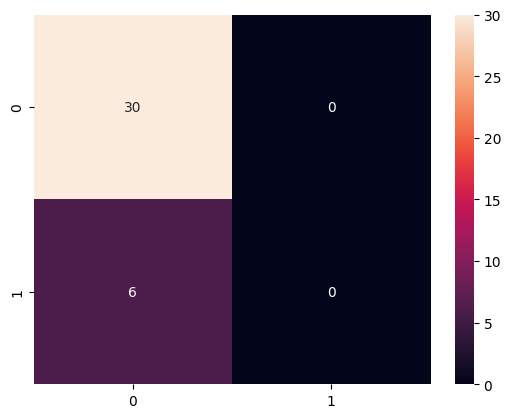

In [80]:
#Create Confusion Matrix - it shows labelwise performance of the model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot = True)